In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import matplotlib.cm as cm
import matplotlib.colors as col

In [5]:
n = 3000
p = [0.706, 0.707, 0.708, 0.709, 0.71, 0.711, 0.712, 0.713, 0.714, 0.715, 0.716]
y = []
for l in range(11):
    rholist = []
    for k in range(30):
        matrix = np.zeros((n, n))
        matrix2 = np.random.rand(n,n)
        for i in range(n):
            for j in range(n):
                if matrix2[i,j] < p[l]:
                    matrix2[i,j] = 0.66
                else:
                    matrix2[i,j] = 0.33
        for i in range(n):
            for j in range(n):
                if i%2 == 0:
                    if j%2 == 0:
                        matrix[i,j] = matrix2[i,j]
                else:
                    if j%2 == 1:
                        matrix[i,j] = matrix2[i,j]
        if matrix[0, int(n/2)] == 0.66:
            matrix[0, int(n/2)] = 1
            for i in range(n-1):
                for j in range(n):
                    if 0 < j < n-1:
                        if matrix[i,j] == 1:
                            if matrix[i+1, j-1] == 0.66:
                                matrix[i+1, j-1] = 1
                            if matrix[i+1, j+1] == 0.66:
                                matrix[i+1, j+1] = 1
                    if j == n-1:
                        if matrix[i,j] == 1:
                            if matrix[i+1, j-1] == 0.66:
                                matrix[i+1, j-1] = 1
                    if j == 0:
                        if matrix[i,j] == 1:
                            if matrix[i+1, j+1] == 0.66:
                                matrix[i+1, j+1] = 1
        x = 0
        for j in range(n):
            if matrix[n-1, j] == 1:
                x = x + 1
        if x > 0:
            rho = x/(n-1)
            rholist = rholist + [rho]
    y = y + [sum(rholist)/len(rholist)]
print(y)

[0.021562743136601087, 0.026967322440813606, 0.02082175539994813, 0.031810603534511504, 0.029713608239783633, 0.03667889296432145, 0.031915400371552424, 0.035617933250477435, 0.05288429476492164, 0.04837326727956938, 0.05197811035050899]


In [4]:
p = [0.706, 0.707, 0.708, 0.709, 0.71, 0.711, 0.712, 0.713, 0.714, 0.715, 0.716]
y = [0.021562743136601087, 0.026967322440813606, 0.02082175539994813, 0.031810603534511504, 0.029713608239783633, 0.03667889296432145, 0.031915400371552424, 0.035617933250477435, 0.05288429476492164, 0.04837326727956938, 0.05197811035050899]

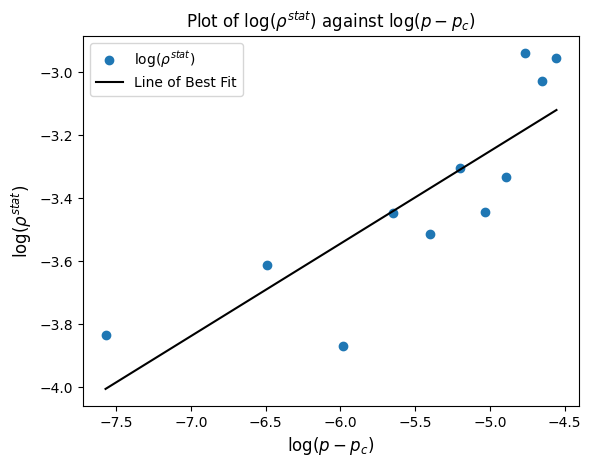

In [8]:
p_minus_pc = (np.array(p)-0.705485)
plt.scatter(np.log(np.array(p)-0.705485), np.log(y))
coeffs = np.polyfit(np.log(p_minus_pc), np.log(y), 1)
poly = coeffs[1] + coeffs[0]*(np.log(p_minus_pc))
plt.plot(np.log(p_minus_pc), poly, c='k')
plt.xlabel('$\\log(p-p_c)$', fontsize = 'large')
plt.ylabel('$\\log(\\rho^{stat})$', fontsize = 'large')
plt.legend(['$\\log(\\rho^{stat})$', 'Line of Best Fit'])
plt.title('Plot of $\\log(\\rho^{stat})$ against $\\log(p-p_c)$', fontsize = 'large')
plt.show()

In [6]:
beta = (poly[-1]-poly[0])/(np.log(p_minus_pc[-1])-np.log(p_minus_pc[0]))
print(beta)

0.2937303109507712
